## Group selection model

This is a simple model of the evolution of cooperativeness by group selection.
There are many existing models of group selection, but this one is particularly minimalist. There are no conflicts between groups, or exogenous events causing the extinction of particular groups. I simply assume that the population is divided into small groups, with a small rate of migration between groups.

### mechanism

Agents live in an archipelago of $k$ islands. Agents play games exclusively with agents living on their own island, and their offspring are born on the same island as the parent. However, after birth, an offspring may migrate to another island, with a probability determined by the migration rate. An agent who migrates simply moves to a randomly selected other island.

The overall population size $N$ remains constant; however, the population of a given island can grow or decrease in size, given how many Cooperators and Defectors live on that island. Islands with a larger proportion of Cooperators grow at a faster rate, but within an island, Defectors tend to have more offspring. 

Concretely, every generation, agents within a group are randomly paired with one another to play a donation game. Then all agents reproduce as a function of their fitness and die. In the donation game, player 1 can 'Cooperate', i.e. pay a cost of  𝑐  to give a benefit  𝑏  to player 2, or 'Defect' (in which case nothing happens). Player 2 is a passive recipient. Groups with many cooperators tend to grow at a faster rate because, given $b > c$, members of a group with many cooperators have higher fitness. However, within a group, defectors avoid paying the cost of cooperation and so they are better off.

### dynamics

Try varying the migration rate to see what happens.

When migration is impossible (i.e. agents remain stuck on their island of birth), Defection eventually prevails. This is because even in an island where everyone is a Cooperator, genetic mutation will inevitably introduce a Defector, whose malevolent gene will eventually take over the whole island.

With a small migration rate, cooperation can evolve and remain stable. This is because in an island about to be overtaken by defectors, a few cooperators can migrate to an empty island to start things afresh. This maintains an overall positive assortment between cooperators.

When the migration rate is too high, however, defectors take over, because a high rate of migration destroys the positive assortment between cooperators that is necessary to maintain cooperation.

### how can cooperation be successful in this model?

Under the right set of parameters, cooperation can evolve. The reason is that when the population is structured in small groups, sometimes by chance there will be groups with more cooperators than others. When that is the case, then on average cooperators meet other cooperators at an above-chance rate (where the above-chance rate is defined as would happen if the population was not structured into groups). Such positive assortment between cooperators makes cooperation evolutionarily successful. With the right migration rate, this positive assortment between cooperators can be self-perpetuating, leading to long-lasting cooperation. 

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

### General parameters of the model

In [3]:
#number of groups
k = 10

#size of a group
n = 20

#population size
N = n * k

#number of generations
g = 700

#mutation rate
mu = .01

#migration rate
migration_rate = 0.02

#initial fitness
initial_fitness = 10



### Specific game parameters

In [4]:
#cost and benefit in the DG
b = 8
c = -1


#the strategy space
strategy_space = ["C", "D"]


#initial_strategy
initial_strategy = "D"

#does assortment depend on group membership, or is it random?
#(the default is 'random_assortment = False'. Try activating randon assortment to see if altruism is still possible)
random_assortment = False

### Define the "agent" class

In [5]:


class agent:
    def __init__(self, name, group, strategy, fitness):
        self.name = name
        self.group = group
        self.strategy = strategy
        self.fitness = fitness
    
    def mutate(self):
        self.strategy=np.random.choice(strategy_space)
        
    def migrate(self):
        self.group = np.random.choice(range(k))
        
    def add_to_fitness(self, increment):
        self.fitness += increment

    def change_group(self, new_group):
        self.group = new_group
        

### Some key functions


In [6]:
#the successor function
#used to pair an element in an array with its successor in that array,
#where the successor is either the next element,
#or the 0th element, if the focal element is the last element in the array

def successor(current, total):
    if current < total:
        return current + 1
    if current == total:
        return 0
    

In [7]:
#generate the initial population
def initialize():
    #note that what we are doing with the second argument of the agent function
    #(which gives the group index of the agent we are creating):
    #we make it so that the n first agents we create belong to group 0, the next n agents belong to group 1, and so on
    return([agent(i, int(np.floor(i/n)), initial_strategy, initial_fitness) for i in range(N)])

In [8]:
#a handy function if we want to look at our population
def print_pop():
    for i in range(N):
        print(pop[i].name, pop[i].group)
    


In [9]:
#the function to compute average cooperativeness

def average_X(X):
    return len([i for i in pop if i.strategy == X])/N

In [10]:
#put agents into pairs and have them play a game

def games():

    
    arena = [[] for j in range(k)]
        
    for i in range(N):
        group_index = pop[i].group
        arena[group_index].append(i) 

    #cycle through groups    
    for j in range(k):
        #if there is more than one agent in the group
        if len(arena[j])>1:
                #shuffle the group
                np.random.shuffle(arena[j])
                #make agents in the group play games with one another
                for i in range(len(arena[j])):
                    index_player1 = i
                    index_player2 = successor(i, len(arena[j])-1)
                    player1 = arena[j][index_player1]
                    player2 = arena[j][index_player2]
                    if (index_player1 != index_player2):
                        DG(player1, player2)



In [11]:
#run games, in the assumption of random assortment
#i.e., assortment is not a function of group membership
def random_games():
    arena = list(range(N))
    np.random.shuffle(arena)

    for i in arena:
        if i % 2 == 0:
            DG(i, i+1)

In [12]:
#the Donation Game

def DG(player1, player2):
    player1_strat = pop[player1].strategy
    player2_strat = pop[player2].strategy
    
    if player1_strat == "C":
        pop[player2].add_to_fitness(b)
        pop[player1].add_to_fitness(c)
    
    
    


In [13]:
#the selection function and its building blocks

#standardize fitness so that agents with lowest fitness have fitness 1
def standardization():
        
        min_fitness = min([i.fitness for i in pop])
        for i in range(N):
            pop[i].fitness += (1 - min_fitness)

#each agent gets to put its name in a hat w times, where w is its fitness
def lottery_prep():
    hat = []
    for i in range(N):
        for j in range(pop[i].fitness):
            hat.append(pop[i].name)
    return hat

#create the next generation by drawing the name of the parents from the hat
def reproduction(hat):
    temporary_pop=[]
    for i in range(N):
        name_drawn = np.random.choice(hat)
        hereditary_package = [pop[name_drawn].group, pop[name_drawn].strategy]
        temporary_pop.append(agent(i, hereditary_package[0], hereditary_package[1], initial_fitness))

    pop.clear()
    for i in range(N):
        pop.append(temporary_pop[i])

    


#the selection function

def selection():

    standardization()
    hat=lottery_prep()
    reproduction(hat)




In [14]:
def migration():
    for i in range(N):
        if (np.random.uniform() < migration_rate):
            pop[i].migrate()

In [15]:
def mutation():
    for i in range(N):
        if (np.random.uniform() < mu):
            pop[i].mutate()

In [16]:
def group_size(group):
    return len([i for i in range(N) if pop[i].group == group])


#the repopulate function (Currently not implemented)
#if an island is empty at the end of the reproduction phase, a randomly chosen
#member of the population migrates there
def repopulate():
    for j in range(k):
        if group_size(j) == 0:
            index = np.random.choice(range(N))
            pop[index].change_group(j)

### Run the model and plot the dynamics

(0, 1.05)

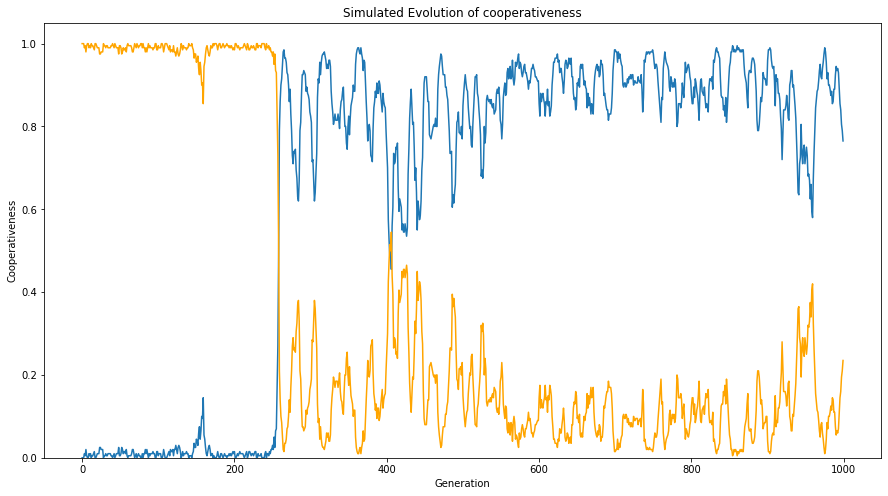

In [17]:
#this array records average Cooperativeness across a run
Average_coop = []
Average_d = []


#create initial population
pop = initialize()

#run the model for g generations
for i in range(g):
    if random_assortment == False:
        games()
    if random_assortment == True:
        random_games()
    selection()
    mutation()
    migration()
    Average_coop.append(average_X("C"))
    Average_d.append(average_X("D"))

#plot results    
plt.figure( figsize=( 15, 8 ) )

plt.title('Simulated Evolution of cooperativeness')

plt.ylabel('Cooperativeness')
plt.xlabel('Generation')
plt.plot(Average_coop)
plt.plot(Average_d, color = "orange")
plt.ylim(0,1.05)



### Legend

Blue = frequency of helpers

Orange = frequency of cheaters